In [25]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import nltk

from keras.layers import Dense, Activation
from keras.layers import SimpleRNN
from keras.models import Sequential

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

Import text

In [26]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

nltk.download('punkt_tab')
    
filename = 'robinhood.txt'
with open(filename, 'r', encoding='utf-8') as file:
    text_data = file.read()

[nltk_data] Downloading package wordnet to /home/eki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/eki/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenize, lemmatizer and stop words

In [27]:
tokens = word_tokenize(text_data)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text_data)

Pre-processed tokens

In [28]:
processed_tokens = [
    lemmatizer.lemmatize(word.lower())
    for word in tokens
    if word.isalpha() and word.lower() not in stop_words and 2 <= len(word) <= 15
]

Bags of words creation, Visualizing bags

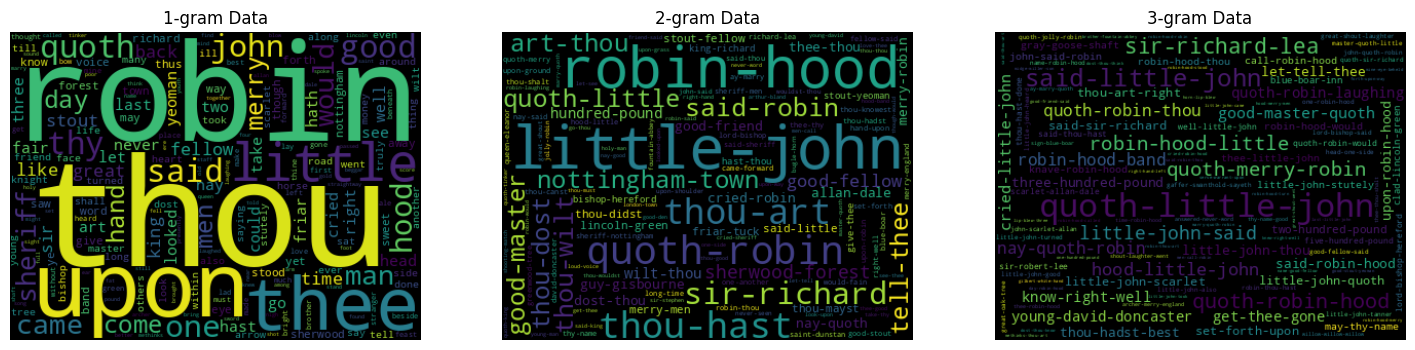

In [30]:
plt.figure(figsize=(18, 6))
for ngram in range(1, 4):    
    raw_bag = Counter(word_tokenize(text_data))
    cleaned_bag = Counter(processed_tokens)

    vectorizer = CountVectorizer(ngram_range=(ngram, ngram))
    ngrams = vectorizer.fit_transform([' '.join(processed_tokens)])
    ngrams_bag = {key.replace(' ', '-'): value for key, value in zip(vectorizer.get_feature_names_out(), ngrams.toarray().sum(axis=0))}

    ngrams_df = pd.DataFrame(ngrams_bag.items(), columns=[f'{ngram}-gram', 'Count']).sort_values(by='Count', ascending=False)

    # Visualize word clouds

    plt.subplot(1, 3, ngram)
    try:
        wordcloud_ngrams = WordCloud(width=400, height=300).generate_from_frequencies(ngrams_bag)
        plt.imshow(wordcloud_ngrams, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{ngram}-gram Data')
    except NameError:
        print("WordCloud module is missing, skipping word cloud visualization for 2-gram data.")

plt.show()

Finding the words and n-grams with most occurences and visualizing

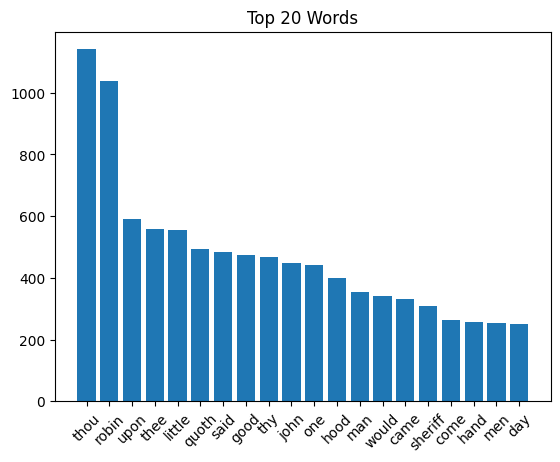

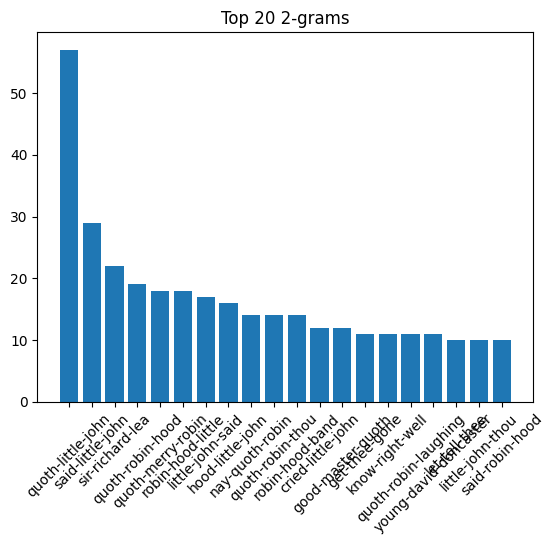

Complete 2-gram Bag of Words:
                      3-gram  Count
33847      quoth-little-john     57
36810       said-little-john     29
40396        sir-richard-lea     22
33925       quoth-robin-hood     19
35672      robin-hood-little     18
...                      ...    ...
18421        hast-done-could      1
18422          hast-done-day      1
18423      hast-done-greater      1
18424         hast-done-thou      1
18411  hast-chosen-adventure      1

[54597 rows x 2 columns]


In [ ]:
top_words = pd.DataFrame(cleaned_bag.most_common(20), columns=['Word', 'Count'])
top_ngrams = pd.DataFrame(sorted(ngrams_bag.items(), key=lambda x: x[1], reverse=True)[:20], columns=['2-gram', 'Count'])

plt.figure()
plt.bar(top_words['Word'], top_words['Count'])
plt.title('Top 20 Words')
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.bar(top_ngrams['2-gram'], top_ngrams['Count'])
plt.title('Top 20 2-grams')
plt.xticks(rotation=45)
plt.show()

print("Complete 2-gram Bag of Words:")
print(ngrams_df)